In [1]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 6.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.0 MB/s eta 0:00:00m eta 0:00:01:01m01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.9 MB/s eta 0:00:001.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "postgres",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [6]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [17]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [18]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [21]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [23]:
df_q1 =df_q1.drop(7)

In [24]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [26]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [27]:
changetype(df_q1)

In [28]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [29]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

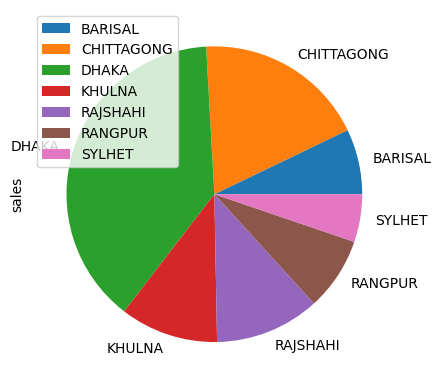

In [30]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

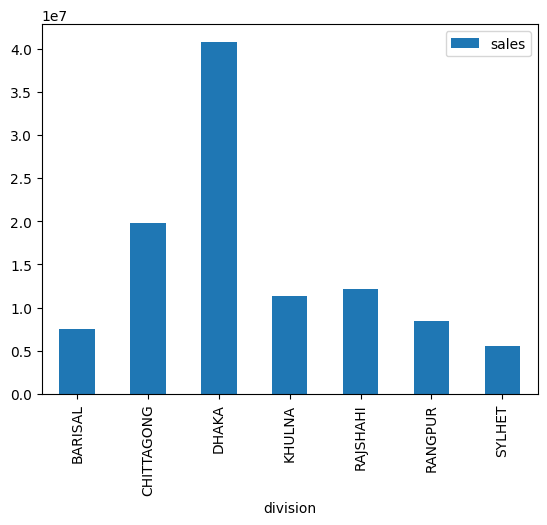

In [31]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [61]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM star_schema.fact_table t " \
              "JOIN star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [ ]:
records

# Q1b: Find the district wise total_sale_price joining fact table and respective dimension table

In [32]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [34]:
df_q2 = pd.DataFrame(records, columns=['district', 'sales'])
df_q2

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25
63,THAKURGAON,729934.25


In [36]:
df_q2 = df_q2.drop(64)
df_q2

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


In [37]:
df_q2 = df_q2.set_index(['district'])
df_q2

,sales
district,
BAGERHAT,1307651.00
BANDARBAN,995360.75
BARGUNA,869041.00
BARISAL,2897237.75
BHOLA,1012205.75
...,...
SIRAJGANJ,1295100.75
SUNAMGANJ,1593774.00
SYLHET,1727717.25


In [38]:
changetype(df_q2)

<Axes: ylabel='sales'>

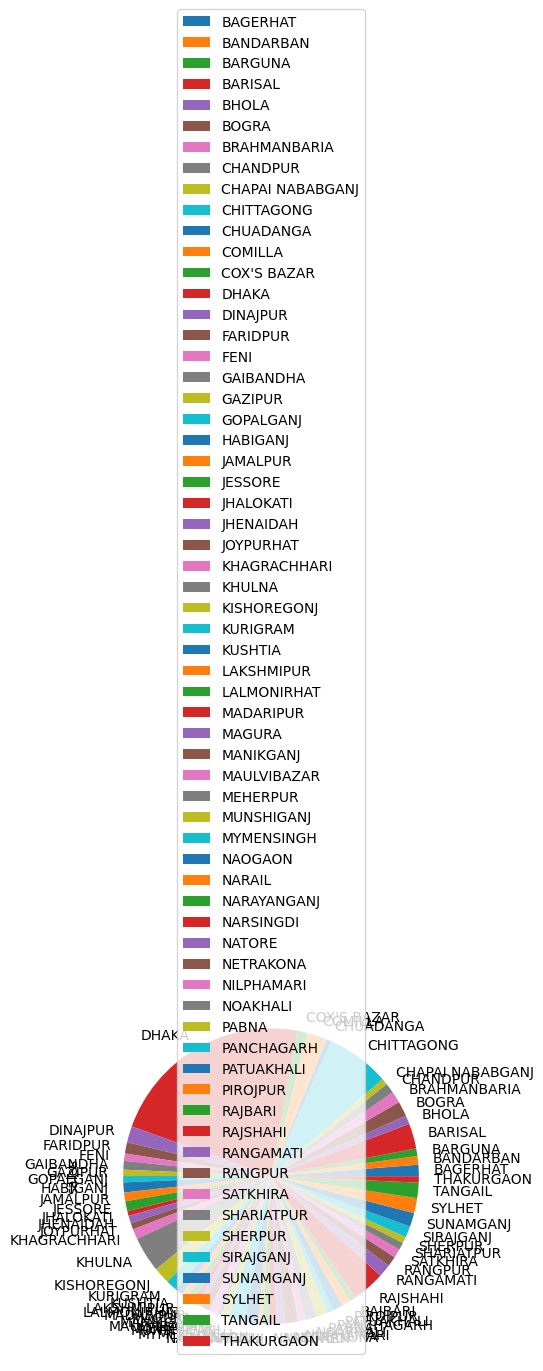

In [39]:
df_q2.plot.pie(y='sales')

# Q1c: Find the year wise total_sale_price joining fact table and respective dimension table

In [40]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [43]:
df_q2 = pd.DataFrame(records, columns=['year', 'sales'])
df_q2

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25
8,NaN,105401435.75


In [44]:
df_q2 = df_q2.drop(8)
df_q2

,year,sales
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [45]:
df_q2 = df_q2.astype({'year': int})
df_q2 = df_q2.set_index(['year'])
df_q2

,sales
year,
2014,14334731.25
2015,15095720.25
2016,14976508.25
2017,15015806.00
2018,15108197.25
2019,14949510.25
2020,15037190.25
2021,883772.25


In [46]:
changetype(df_q2)

<Axes: ylabel='sales'>

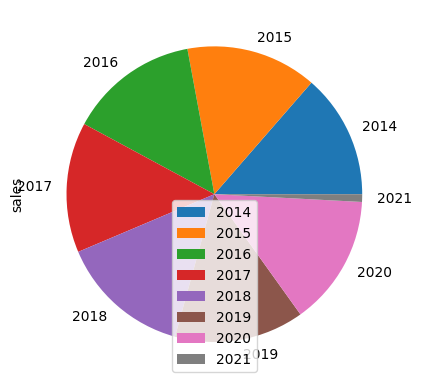

In [47]:
df_q2.plot.pie(y='sales')

# Q1d: Find the month wise total_sale_price joining fact table and respective dimension table

In [56]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.month, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.month) " \
                "ORDER BY s.month "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [57]:
df_q4 = pd.DataFrame(records, columns=['month', 'sales'])
df_q4

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [58]:
df_q4 = df_q4.drop(12)
df_q4

,month,sales
0,1.0,9042244.00
1,2.0,8073877.50
2,3.0,8939152.00
3,4.0,8504634.75
4,5.0,9078002.50
5,6.0,8556853.00
6,7.0,9046580.00
7,8.0,8929475.25
8,9.0,8724326.50
9,10.0,8902783.75


In [59]:
df_q4 = df_q4.astype({'month': int})
df_q4 = df_q4.set_index(['month'])
df_q4

,sales
month,
1,9042244.00
2,8073877.50
3,8939152.00
4,8504634.75
5,9078002.50
6,8556853.00
7,9046580.00
8,8929475.25
9,8724326.50


In [60]:
changetype(df_q4)

<Axes: ylabel='sales'>

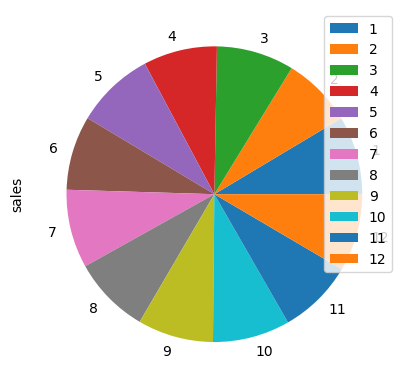

In [61]:
df_q4.plot.pie(y='sales')

# Q2a: Find the customer wise total_sale_price joining fact table and respective dimension table

In [63]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim c on c.customer_key=t.customer_key " \
                "GROUP BY CUBE(c.name) " \
                "ORDER BY c.name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [67]:
df = pd.DataFrame(records, columns=['name', 'sales'])
df = df.drop(4537)
df

,name,sales
0,-,20643.50
1,aafreen fatima,11174.75
2,aafrin,22136.75
3,aafrin @ dolly,23529.75
4,aaftaab husan,9682.00
...,...,...
4532,बबीता,10509.75
4533,मन्जू,10575.75
4534,माया,9862.50
4535,सरोज,11280.00


# Q2b: Find the bank wise total_sale_price joining fact table and respective dimension table

In [69]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.bank_name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.bank_name) " \
                "ORDER BY s.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


<Axes: xlabel='bank_name'>

<Figure size 1000x500 with 0 Axes>

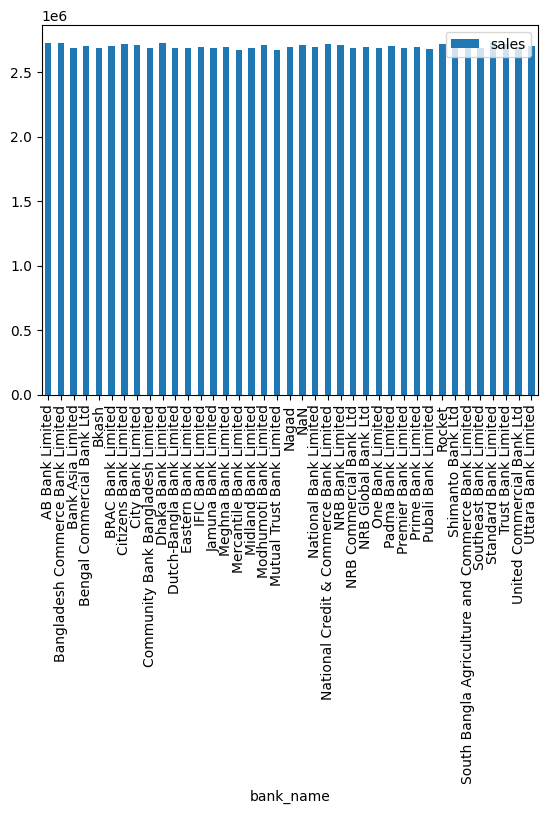

In [74]:
df = pd.DataFrame(records, columns=['bank_name', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index('bank_name')
changetype(df)
plt.figure(figsize=(10,5))
df.plot.bar(y='sales')

# Q2c: Find the transaction wise total_sale_price joining fact table and respective dimension table

In [76]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.trans_type, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.trans_type) " \
                "ORDER BY s.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


<Axes: ylabel='sales'>

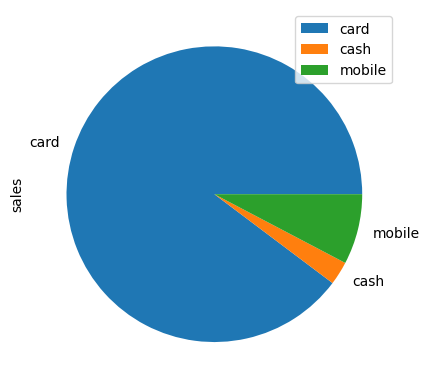

In [77]:
df = pd.DataFrame(records, columns=['trans_type', 'sales'])
df = df.drop(df.index[-1])
df = df.set_index('trans_type')
changetype(df)
df.plot.pie(y='sales')

# Q3: Find the total sales of Barisal

In [99]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "WHERE s.division='BARISAL' " \
                "GROUP BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [100]:
df = pd.DataFrame(records, columns=['division', 'sales'])
df

,division,sales
0,BARISAL,7520343.75


# Q4: Find the total sales in 2015

In [101]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "WHERE s.year=2015 " \
                "GROUP BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [102]:
df = pd.DataFrame(records, columns=['division', 'sales'])
df

,division,sales
0,2015,15095720.25


# Q5: Find the total sales of Barisal in 2015

In [110]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT u.division, s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
            "JOIN ecomdb_star_schema.store_dim u on u.store_key=t.store_key " \
                "WHERE s.year=2015 AND u.division='BARISAL' " \
                "GROUP BY s.year, u.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [111]:
records
df = pd.DataFrame(records, columns=['division', 'year', 'sales'])
df

,division,year,sales
0,BARISAL,2015,1076902.75


# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [140]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.store_key, t.item_name, t.quantity " \
                "FROM ( " \
                    "SELECT p.store_key, q.item_name, SUM(p.quantity) as quantity, " \
                    "ROW_NUMBER() OVER (PARTITION BY p.store_key ORDER BY SUM(p.quantity) DESC) AS row_num " \
                    "FROM ecomdb_star_schema.fact_table p JOIN ecomdb_star_schema.item_dim q on p.item_key=q.item_key " \
                    "GROUP BY p.store_key, q.item_name " \
                ") AS t " \
                "WHERE t.row_num <= 3"
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [142]:
df = pd.DataFrame(records, columns=['store_key', 'item_name', 'sales'])
df

,store_key,item_name,sales
0,S0001,Pepsi - 12 oz cans,92
1,S0001,Muscle Milk Protein Shake Van. 11oz,90
2,S0001,Hefty Supreme Foam Plates 6 inch,78
3,S0002,Planters Nut-trition 1.5 oz,83
4,S0002,Altoids Small Packs Variety,80
...,...,...,...
2173,S0098,Cliff Builders Protein Bar Variety Pack,84
2174,S0098,Pepsi - 12 oz cans,79
2175,S0099,Pepsi - 12 oz cans,93
2176,S0099,Diet Coke - 12 oz cans,87


# Q7: What products have been sold through card or mobile since X days?

In [147]:
x = int(input())

1000


In [150]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT DISTINCT i.item_name " \
                "FROM ecomdb_star_schema.fact_table f JOIN ecomdb_star_schema.time_dim t on f.time_key=t.time_key " \
                "JOIN ecomdb_star_schema.trans_dim u on f.payment_key=u.payment_key " \
                "JOIN ecomdb_star_schema.item_dim i on f.item_key=i.item_key " \
                "WHERE CURRENT_DATE - t.t_date <= {} AND (u.trans_type='card' OR u.trans_type='mobile')".format(x)
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [152]:
df = pd.DataFrame(records, columns=['item_name'])
df

,item_name
0,100% Juice Box Variety 6.75 oz
1,Advil 2 pill packets
2,All Purpose Cleaner 409 Spray
3,Altoids Small Packs Variety
4,Apple Sauce Variety GoGO Squeeze 3.2oz
...,...
254,Welch's 100% Juice Variety10 oz
255,Wint O Green LifeSavers Sugar Free
256,Wonderful Pistachios (in shell)
257,Yoplait Original Yogurt Variety Pack


# Q8: What season(quarter) is the worst for each product item?

In [153]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT t.item_name, t.quarter " \
                "FROM ( " \
                "SELECT i.item_name, t.quarter, ROW_NUMBER() OVER (PARTITION BY i.item_name ORDER BY SUM(f.quantity) ASC) as row_num " \
                "FROM ecomdb_star_schema.fact_table f JOIN ecomdb_star_schema.item_dim i on f.item_key=i.item_key " \
                "JOIN ecomdb_star_schema.time_dim t on f.time_key=t.time_key " \
                "GROUP BY i.item_name, t.quarter " \
                ") AS t " \
                "WHERE row_num=1 "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [154]:
df = pd.DataFrame(records, columns=['item_name', 'quarter'])
df

,item_name,quarter
0,100% Juice Box Variety 6.75 oz,Q1
1,Advil 2 pill packets,Q1
2,All Purpose Cleaner 409 Spray,Q1
3,Altoids Small Packs Variety,Q3
4,Apple Sauce Variety GoGO Squeeze 3.2oz,Q4
...,...,...
254,Welch's 100% Juice Variety10 oz,Q2
255,Wint O Green LifeSavers Sugar Free,Q1
256,Wonderful Pistachios (in shell),Q1
257,Yoplait Original Yogurt Variety Pack,Q1
